In [89]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [90]:
my_data = pd.read_csv("drug200.csv")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [91]:
my_data.shape

(200, 6)

In [92]:
X = my_data[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [93]:
y = my_data[["Drug"]].values
y[0:5]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY']], dtype=object)

In [94]:
from sklearn import preprocessing

In [95]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(["F", "M"])
X[:, 1] = le_sex.transform(X[:, 1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit(["LOW", "NORMAL", "HIGH"])
X[:, 2] = le_BP.transform(X[:, 2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(["NORMAL", "HIGH"])
X[:, 3] = le_Chol.transform(X[:, 3])


X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(
    X, y, test_size=0.3, random_state=3
)

In [98]:
print("X trains set: ", X_trainset.shape)
print("X test: ", X_testset.shape)

X trains set:  (140, 5)
X test:  (60, 5)


In [99]:
print("y trains set: ", y_trainset.shape)
print("y test: ", y_testset.shape)

y trains set:  (140, 1)
y test:  (60, 1)


In [100]:
drug_Tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
print(drug_Tree)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [101]:
drug_Tree.fit(X_trainset, y_trainset)
print(drug_Tree)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [102]:
pred_Tree = drug_Tree.predict(X_testset)

In [103]:
print(pred_Tree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
[['drugY']
 ['drugX']
 ['drugX']
 ['drugX']
 ['drugX']]


In [105]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_testset, pred_Tree))

Decision Tree's Accuracy:  0.9833333333333333


In [106]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

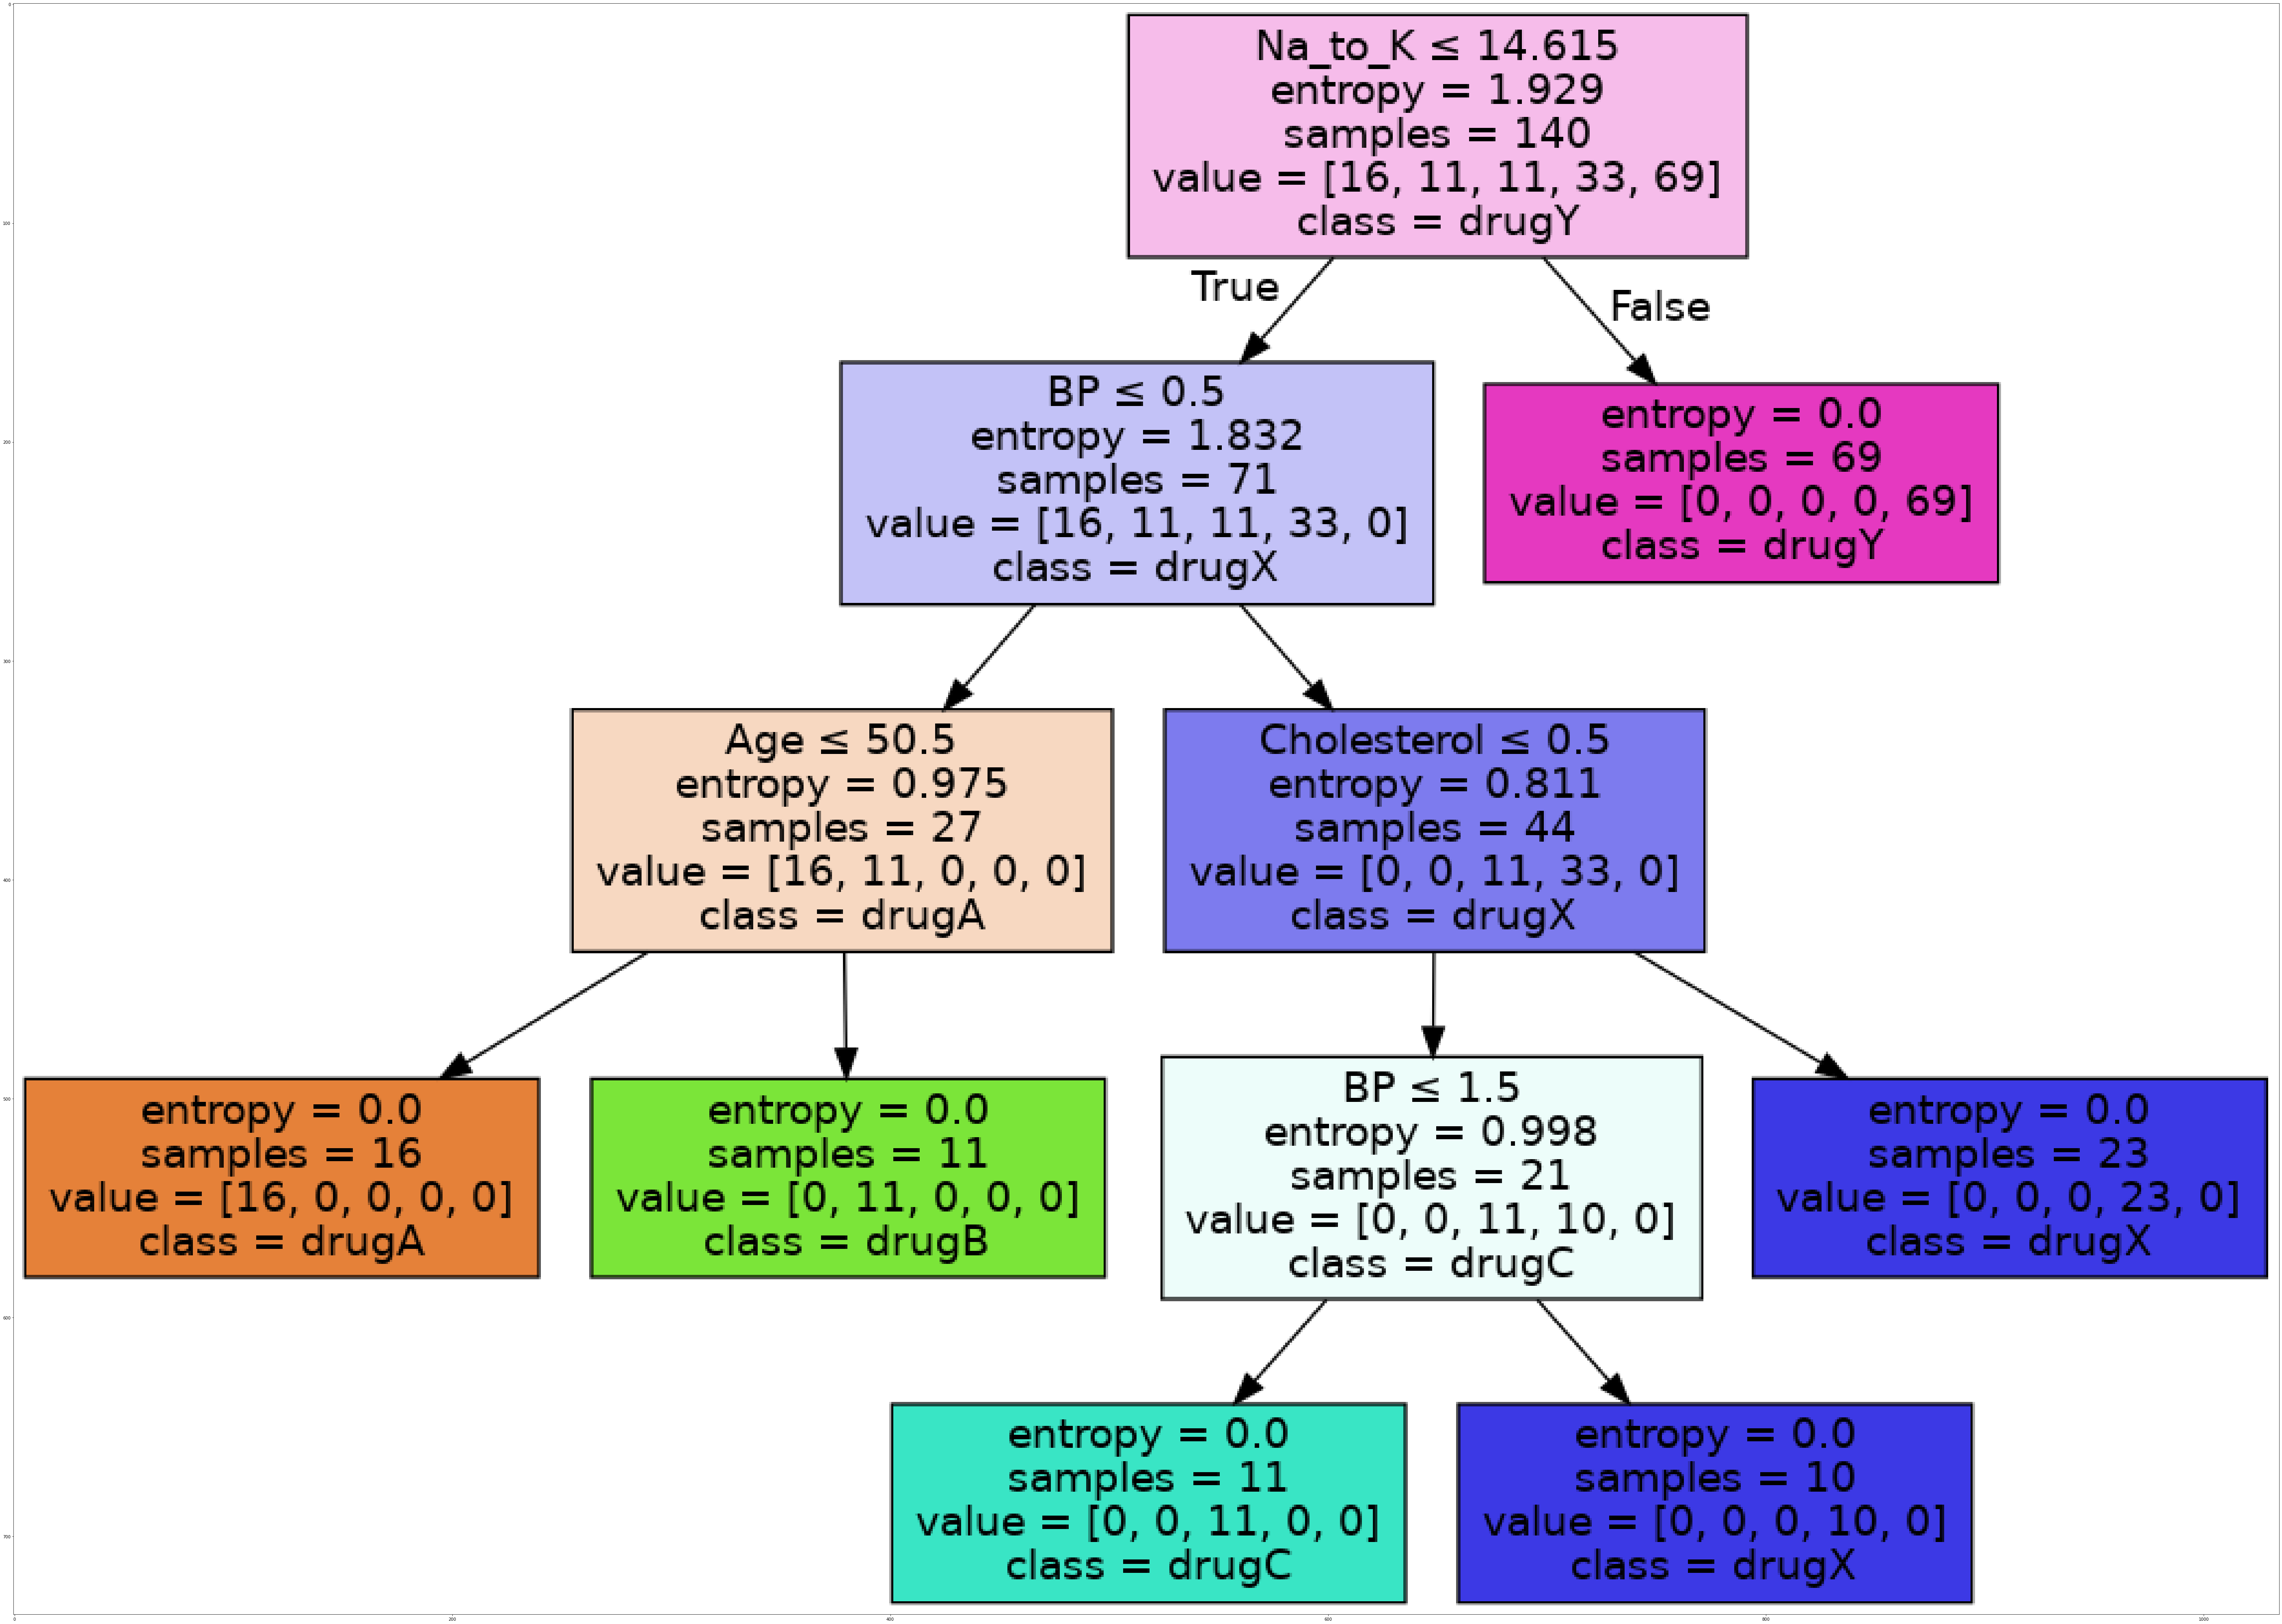

In [117]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out = tree.export_graphviz(
    drug_Tree,
    feature_names=featureNames,
    out_file=dot_data,
    class_names=np.unique(y_trainset),
    filled=True,
    special_characters=True,
    rotate=False,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation="nearest")